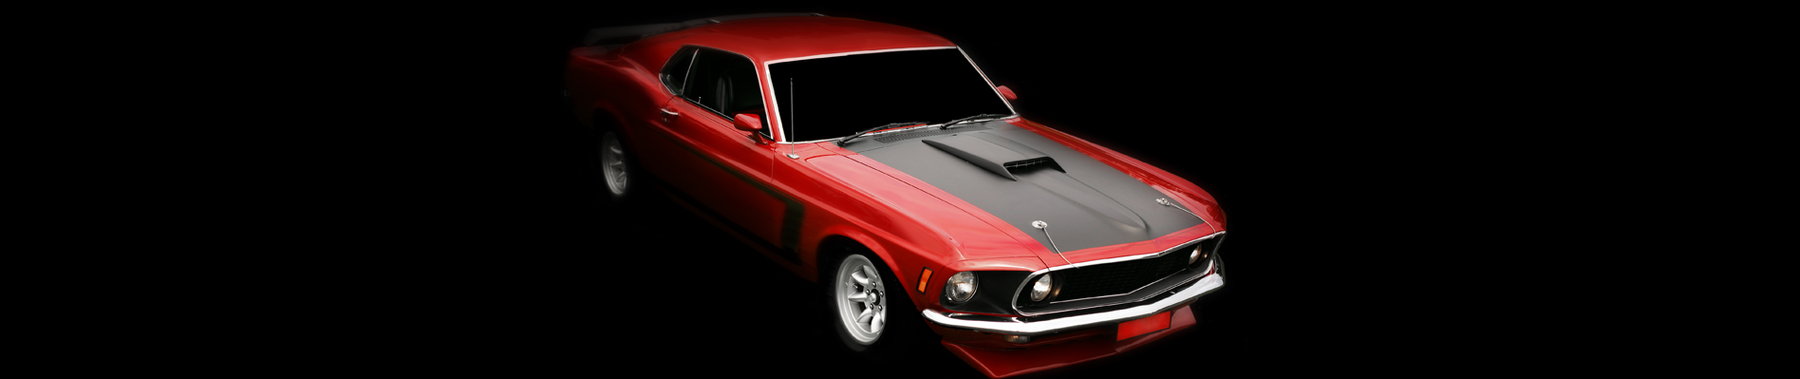

In [99]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [100]:
df = pd.read_csv("https://raw.githubusercontent.com/Suthir24/Datasets/main/auto-mpg.csv")

In [101]:
df['horsepower']=df['horsepower'].replace('?',np.NaN)

In [102]:
df.describe()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [103]:
df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

In [104]:
df.sample(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
219,25.5,4,122.0,96,2300,15.5,77,1,plymouth arrow gs
199,20.0,6,225.0,100,3651,17.7,76,1,dodge aspen se
104,12.0,8,400.0,167,4906,12.5,73,1,ford country
114,26.0,4,98.0,90,2265,15.5,73,2,fiat 124 sport coupe
189,15.5,8,304.0,120,3962,13.9,76,1,amc matador
96,13.0,8,360.0,175,3821,11.0,73,1,amc ambassador brougham
380,36.0,4,120.0,88,2160,14.5,82,3,nissan stanza xe
378,38.0,4,105.0,63,2125,14.7,82,1,plymouth horizon miser
61,21.0,4,122.0,86,2226,16.5,72,1,ford pinto runabout
309,41.5,4,98.0,76,2144,14.7,80,2,vw rabbit


In [105]:
df['horsepower'] = df['horsepower'].astype(float)

In [106]:
med=df["horsepower"].median()
med

93.5

In [107]:
df['horsepower']=df['horsepower'].replace(np.NaN,med)
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.304020,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,38.222625,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,76.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,125.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [108]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [109]:
df.drop('car name',inplace = True,axis = 1)

In [110]:
df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight            int64
acceleration    float64
model year        int64
origin            int64
dtype: object

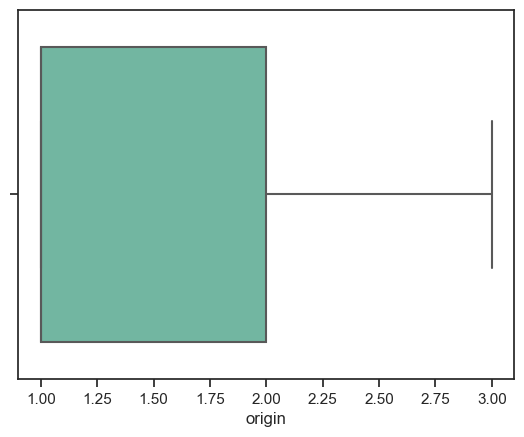

In [111]:
sns.boxplot(x = 'origin', data = df)
plt.show()

In [112]:
def remove_outlier (col):
    sorted(col)
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5*IQR)
    upper_range=Q3+(1.5*IQR)
    return lower_range, upper_range

In [113]:
lowac,upac = remove_outlier(df['acceleration'])
df['acceleration']= np.where(df['acceleration']>upac,upac,df['acceleration'])
df['acceleration']= np.where(df['acceleration']<lowac,lowac,df['acceleration'])

In [114]:
lowmpg,upmpg = remove_outlier(df['mpg'])
df['mpg']= np.where(df['mpg']>upmpg,upmpg,df['mpg'])
df['mpg']= np.where(df['mpg']<lowmpg,lowmpg,df['mpg'])

In [115]:
lowcy,upcy = remove_outlier(df['cylinders'])
df['cylinders']= np.where(df['cylinders']>upcy,upcy,df['cylinders'])
df['cylinders']= np.where(df['cylinders']<lowcy,lowcy,df['cylinders'])

In [116]:
df['cylinders'].unique()

array([8., 4., 6., 3., 5.])

In [117]:
lowpd,uppd = remove_outlier(df['displacement'])
df['displacement']= np.where(df['displacement']>uppd,uppd,df['displacement'])
df['displacement']= np.where(df['displacement']<lowpd,lowpd,df['displacement'])

In [118]:
lowhp,uphp = remove_outlier(df['horsepower'])
df['horsepower']= np.where(df['horsepower']>uphp,uphp,df['horsepower'])
df['horsepower']= np.where(df['horsepower']<lowhp,lowhp,df['horsepower'])

In [119]:
loww,upw = remove_outlier(df['weight'])
df['weight']= np.where(df['weight']>upw,upw,df['weight'])
df['weight']= np.where(df['weight']<loww,loww,df['weight'])

In [120]:
loworg,uporg = remove_outlier(df['origin'])
df['origin']= np.where(df['origin']>uporg,uporg,df['origin'])
df['origin']= np.where(df['origin']<loworg,loworg,df['origin'])

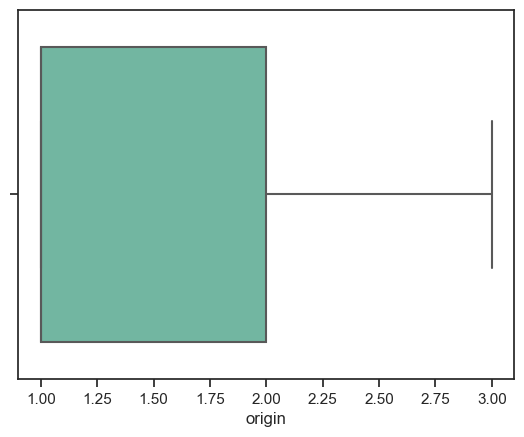

In [121]:
sns.boxplot(x = 'origin', data = df)
plt.show()

In [122]:
df['origin'] = df['origin'].replace({1:'america',2:'africa',3:'asia'})

In [123]:
df = pd.get_dummies(df,columns = ['origin'])

In [124]:
df.dtypes

mpg               float64
cylinders         float64
displacement      float64
horsepower        float64
weight            float64
acceleration      float64
model year          int64
origin_africa       uint8
origin_america      uint8
origin_asia         uint8
dtype: object

In [125]:
numeric_col=[feature for feature in df if df[feature].dtype!='O']
numeric_col

['mpg',
 'cylinders',
 'displacement',
 'horsepower',
 'weight',
 'acceleration',
 'model year',
 'origin_africa',
 'origin_america',
 'origin_asia']

## UNIVARIATE VISUALIZATIONS :

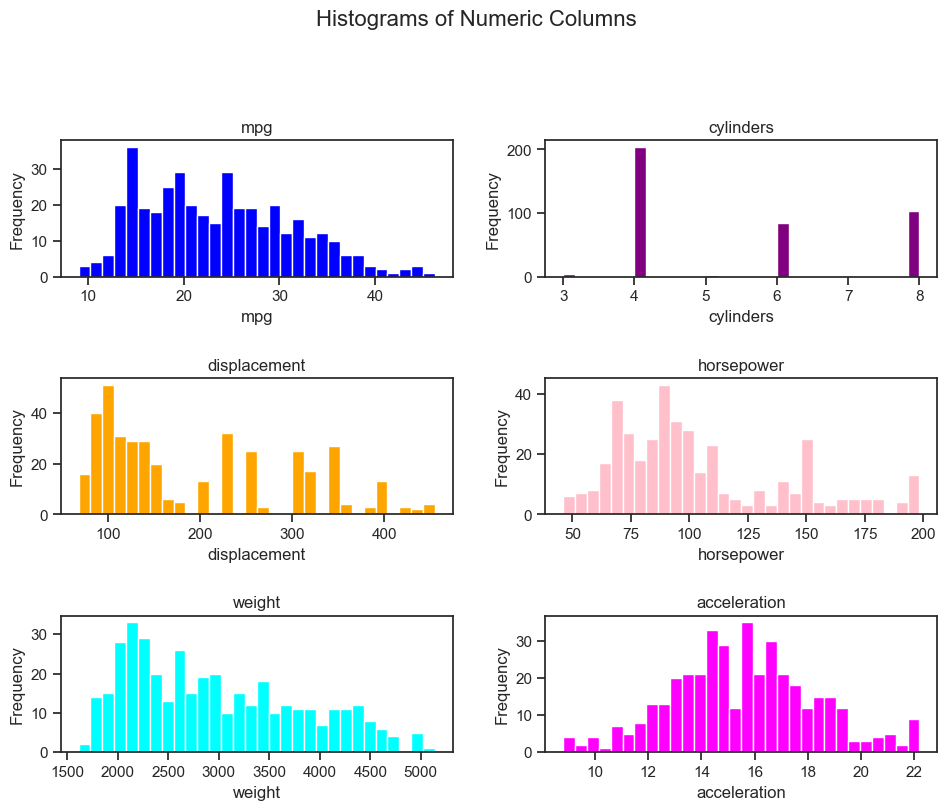

In [126]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
color_palette = ['blue', 'purple', 'orange', 'pink', 'cyan', 'magenta']

for i, col in enumerate(numeric_col[:6]):
    plt.subplot(3, 2, i + 1)
    plt.hist(df[col], bins=30, color=color_palette[i])
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.title(col)

plt.suptitle('Histograms of Numeric Columns', fontsize=16, y=1.03)
plt.tight_layout(pad=2.0)
plt.show()


<Axes: xlabel='model year', ylabel='Density'>

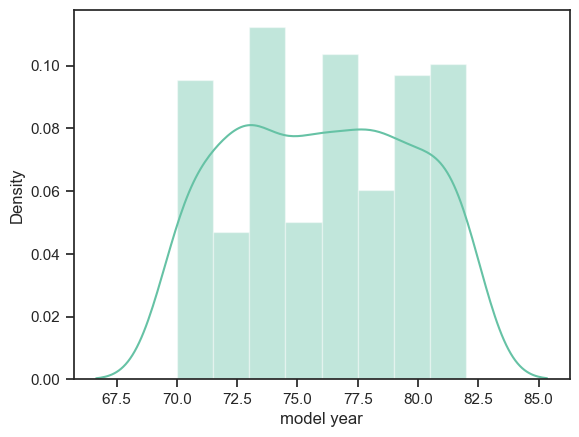

In [127]:
sns.distplot(df['model year'])

## BIVARIATE VISUALIZATIONS :

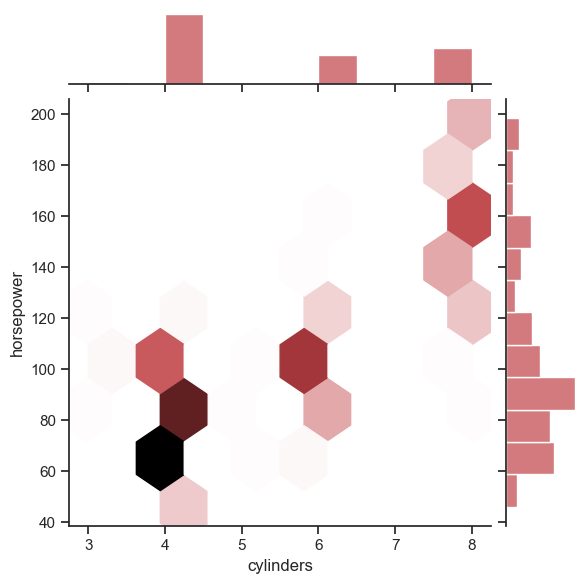

In [128]:
sns.jointplot(x=df.cylinders, y=df.horsepower, kind="hex", data = df,color = 'r')

<Figure size 800x600 with 0 Axes>

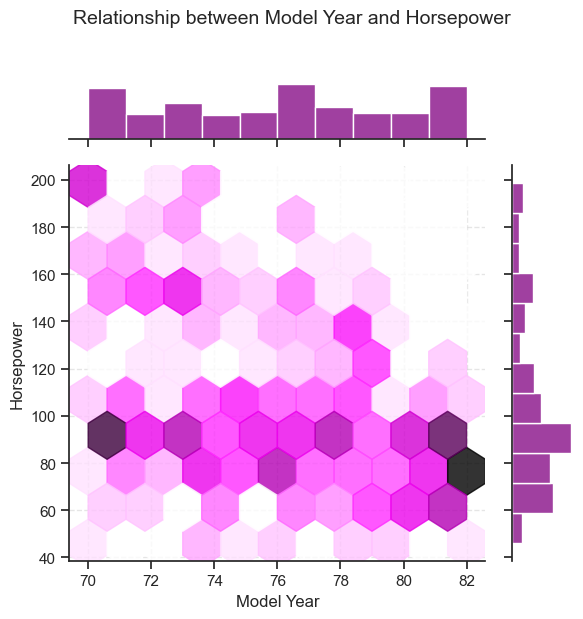

In [129]:
sns.set(style="ticks")
plt.figure(figsize=(8, 6))
plot = sns.jointplot(x="model year", y="horsepower", data=df, kind="hex", color="purple")
plot.set_axis_labels("Model Year", "Horsepower", fontsize=12)
plot.ax_joint.collections[0].set_alpha(0.8)
plot.fig.suptitle("Relationship between Model Year and Horsepower", fontsize=14, y=1.03)
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

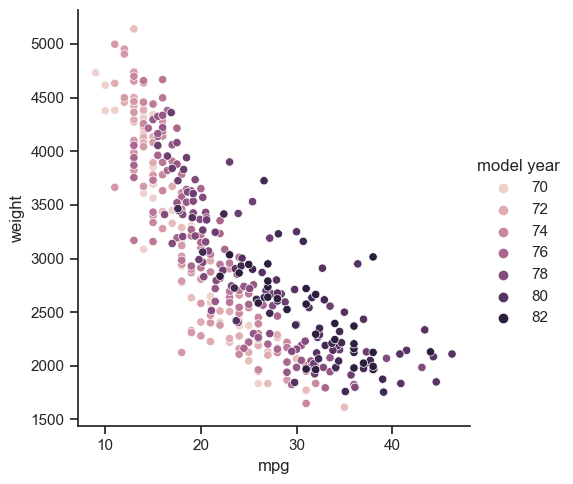

In [130]:
sns.relplot(x="mpg", y="weight",hue = "model year", data = df)

## MULTIVARIATE VISUALIZATIONS :

<Axes: >

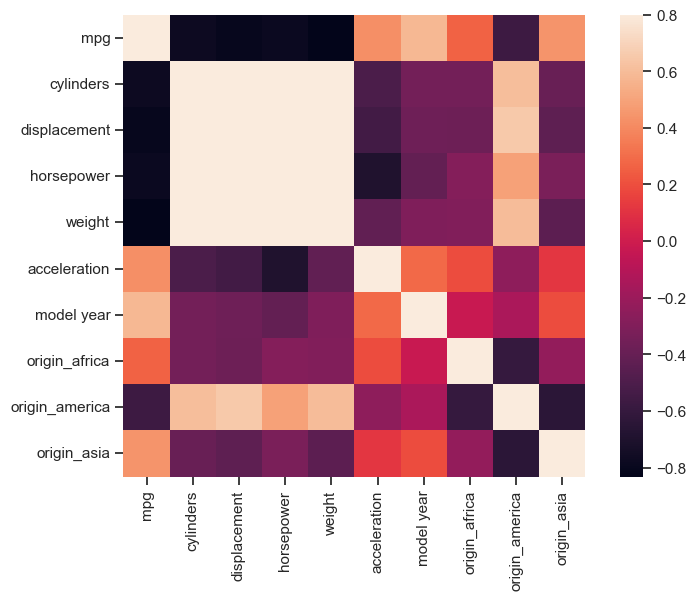

In [131]:
corrmat = df.corr()
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(corrmat, vmax=.8, square=True)

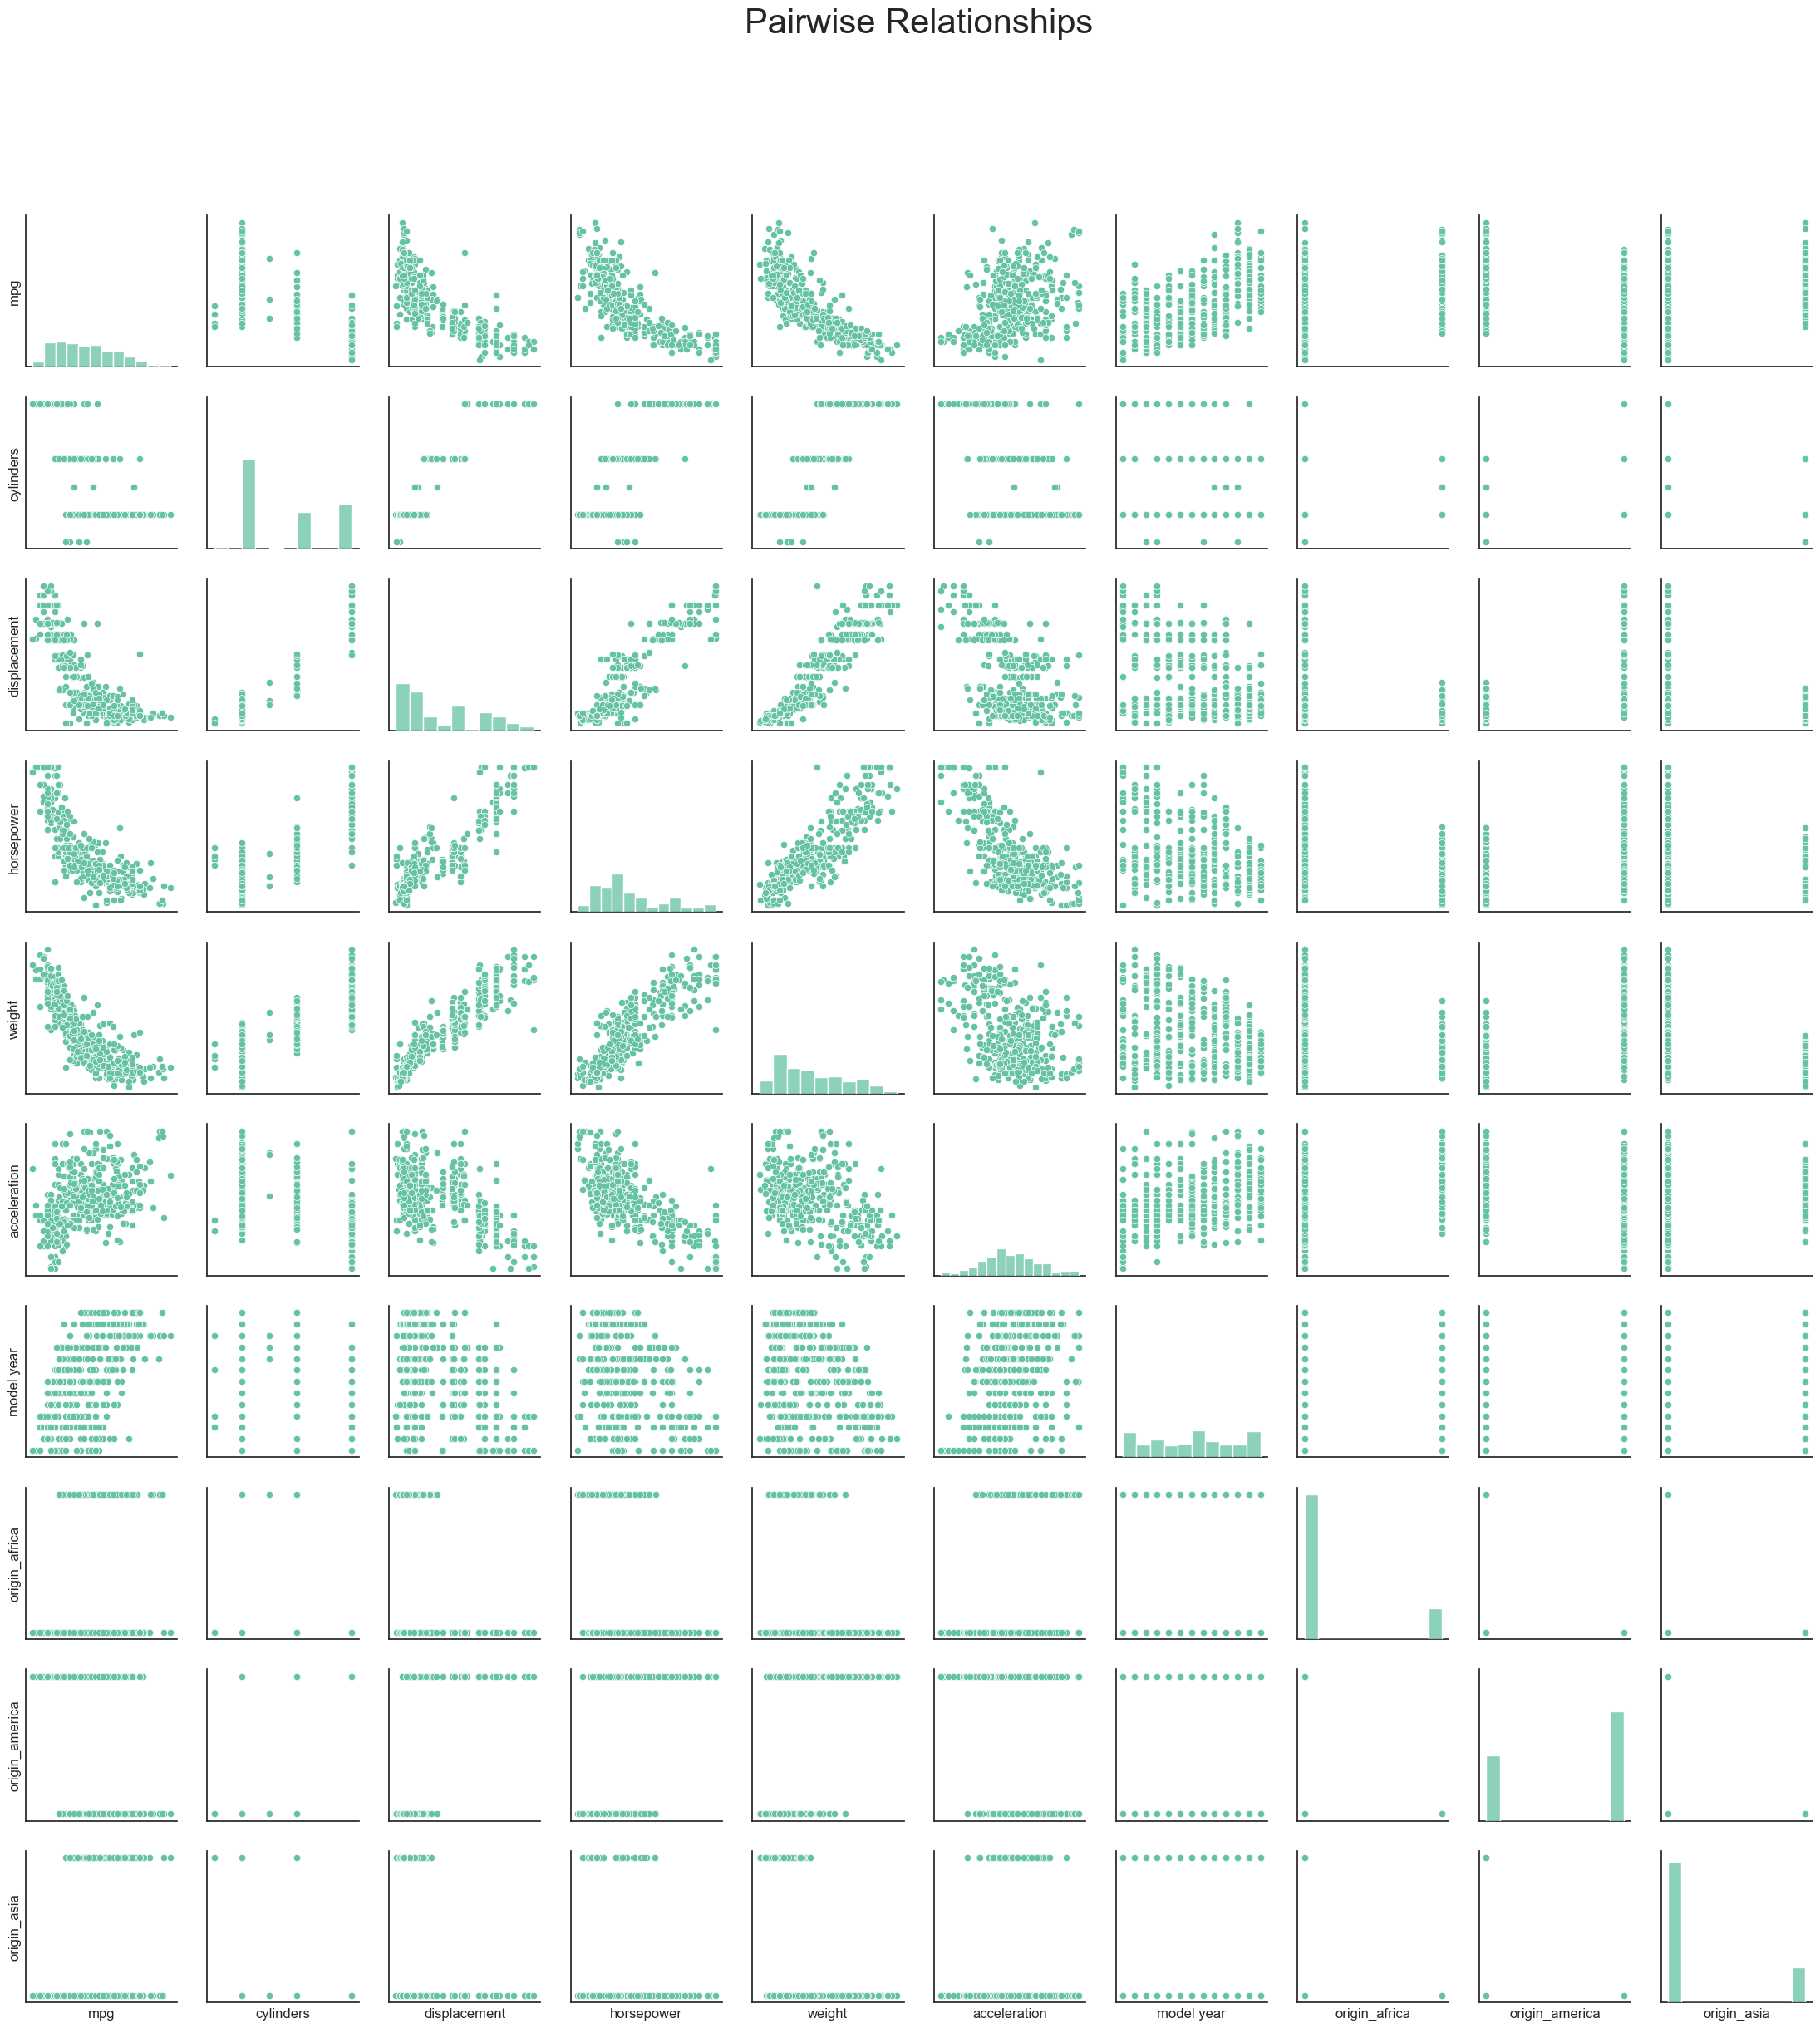

In [132]:
sns.set(style='ticks', palette='Set2')

pairplot = sns.pairplot(df)
pairplot.fig.suptitle('Pairwise Relationships', y=1.03, fontsize=30)
pairplot.set(xticks=[], yticks=[])
pairplot.fig.subplots_adjust(top=0.93, bottom=0.07, left=0.07, right=0.93, hspace=0.2, wspace=0.2)

plt.show()

## Scaling

In [133]:
X = df.drop(['mpg'],axis = 1)
y = df['mpg']

In [134]:
from scipy.stats import zscore

In [135]:
XScaled  = X.apply(zscore) 
XScaled.describe()

,cylinders,displacement,horsepower,weight,acceleration,model year,origin_africa,origin_america,origin_asia
count,3.980000e+02,3.980000e+02,398.000000,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,398.000000
mean,-3.570567e-17,-1.785283e-17,0.000000,-1.606755e-16,-1.071170e-16,-1.642461e-15,-5.802171e-17,6.248491e-17,0.000000
std,1.001259e+00,1.001259e+00,1.001259,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259
min,-1.444949e+00,-1.204411e+00,-1.573625,-1.604943e+00,-2.510317e+00,-1.627426e+00,-4.619682e-01,-1.292726e+00,-0.497643
25%,-8.563206e-01,-8.563178e-01,-0.756726,-8.828266e-01,-6.420819e-01,-8.150739e-01,-4.619682e-01,-1.292726e+00,-0.497643
50%,-8.563206e-01,-4.314040e-01,-0.280202,-1.973624e-01,-1.933672e-02,-2.721449e-03,-4.619682e-01,7.735590e-01,-0.497643
75%,1.498191e+00,6.584879e-01,0.577542,7.538337e-01,6.034085e-01,8.096310e-01,-4.619682e-01,7.735590e-01,-0.497643
max,1.498191e+00,2.511784e+00,2.578945,2.565185e+00,2.471644e+00,1.621983e+00,2.164651e+00,7.735590e-01,2.009471


In [136]:
from sklearn import preprocessing

y_scaled = preprocessing.scale(y)
y_scaled = pd.DataFrame(y_scaled)

In [137]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.30,random_state = 0)

In [138]:
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

for col_name, coef in zip(X_train.columns, regression_model.coef_):
    print("The coefficient for {} is {}".format(col_name, coef))


The coefficient for cylinders is -0.2676255188577286
The coefficient for displacement is 0.023655629182002813
The coefficient for horsepower is -0.03561901420742072
The coefficient for weight is -0.006310020242346706
The coefficient for acceleration is 0.10481390330102038
The coefficient for model year is 0.7543799338055015
The coefficient for origin_africa is 0.7316095696235188
The coefficient for origin_america is -1.8466931284552606
The coefficient for origin_asia is 1.1150835588317398


In [139]:
intercept = regression_model.intercept_
print("The intercept for our model is {}".format(intercept))



The intercept for our model is -15.491530537519566


In [140]:
regression_model.score(X_train,y_train)

0.8217054497713268

In [141]:
regression_model.score(X_test,y_test)

0.8249266726062291

## Splitting

In [142]:
X = df.drop(['mpg'],axis = 1)
y = df['mpg']

In [143]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.30,random_state = 0)

## Fit Linear Model

In [144]:
model_1 = LinearRegression()
model_1.fit(X_train,y_train)

LinearRegression()

In [145]:
model_1.score(X_train,y_train)

0.8217054497713268

In [146]:
model_1.score(X_test,y_test)

0.8249266726062291

## Polynomial Regression

In [147]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
poly = PolynomialFeatures(degree = 2,interaction_only = True)
X_train2 = poly.fit_transform(X_train)
X_test2 = poly.fit_transform(X_test)
model_2 = linear_model.LinearRegression()
model_2.fit(X_train2,y_train)

LinearRegression()

In [148]:
model_2.score(X_train2,y_train)


0.9042123800293906

In [149]:

model_2.score(X_test2,y_test)

0.8678598481568033